In [8]:
import Analysis
import cPickle as pickle
reload(Analysis)

A = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore')

A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')

# Load 2FGL 
A.AddPointSourceTemplate(fixNorm=True, pscmap=A.basepath + '/PSC_' + A.tag + '_fgl2.npy')

A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '.npy',
                        alpha_psc=5., f_psc=0.1)



A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties

A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False)

A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.26, 
                r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None,)

#A.AddGalpropTemplate(basedir='/data/galprop2/output/', tag='Lorimer_z6kpc_R20kpc_Ts100000K_EBV5mag', 
#                     verbosity=1, multiplier=1., bremsfrac=1.25, E_subsample=3, fixSpectrum=False)
A.AddGalpropTemplate(basedir='/data/galprop2/output/', tag='base_no_secondary', 
                     verbosity=1, multiplier=1., bremsfrac=1.25, E_subsample=3, fixSpectrum=False)

A.PrintTemplates()

Loading FITS
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
                  DM              [None, None]  1.000e+00      False      False        GEN
                 PSC              [None, None]  1.000e+00       True       True        PSC
           Pi0_Brems              [None, None]  1.000e+00      False      False        GEN
           Isotropic              [None, None]  1.000e+00      False      False        ISO
                 ICS              [None, None]  1.000e+00      False      False        GEN
             Bubbles              [None, None]  1.000e+00      False      False        GEN


In [17]:
def SaveFit(s, filename=None):
    '''
    Returns a dictionary of fit results and saves a pickle object to the specified filepath if not None.
    This contains the following entries:\n
    'loglike': A single value, or list of the log likelihoods for each energy bin.\n
    'energies': The central energy of each bin (in log-space).\n

    For each template in the fit there is also a key corresponding to the template name
     which has a dictionary value containing:\n
        'flux': dNdE in [s^-1 cm^-2 sr^-1 MeV^-1]\n
        'fluxunc': Statistical (and fitting) error on dNdE in same units (possibly 2-col asymmetric errors)\n
    :param filename: filename to save the dictionary (saved as a pickle object).
    :return: The dict saved above
    '''

    saveDict = {'loglike': s.loglike, 'energies': s.central_energies}

    for key, t in s.templateList.items():
        e, flux, fluxunc = s.GetSpectrum(key)
        saveDict[key] = {'flux': flux, 'fluxunc': fluxunc}
    # Also append the data.
    e, flux, fluxunc = s.GetSpectrum('Data')
    saveDict['Data'] = {'flux': flux, 'fluxunc': fluxunc}

    if filename is not None:
        pickle.dump(saveDict, open(filename, 'wb'))

    return saveDict


#A.RunLikelihood(print_level=0, tol=1e2, precision=None, minos=True)
fgl2Fit = SaveFit(s=A, filename='./results/2fgl_base.pickle')



A.AddPointSourceTemplate(fixNorm=True)
A.RunLikelihood(print_level=1, tol=1e2, precision=None, minos=True)
fgl3Fit = SaveFit(A, filename='./results/3fgl_base.pickle')




                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
                  DM              [None, None]     Vector      False      False        GEN
         --------------------------------------------------------------------------------------
                 [0]              [None, None]  9.981e+00      False      False        GEN
                 [1]              [None, None]  6.636e-02      False      False        GEN
                 [2]              [None, None]  1.044e-01      False      False        GEN
                 [3]              [None, None]  5.028e-01      False      False        GEN
                 [4]              [None, None]  6.427e-01      False      False        GEN
                 [5]              [None, None]  1.437e-01      False      False        GEN
                 [6]              [None, None]  1.848e-01      False      False        GEN
                 [7]              [None, None]  1.782e-01      False      False      

FCN = -362517.540451 
 TOTAL NCALL = 162 
 NCALLS = 162 
 
 
 EDM = 0.00269757469633 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,9.414332e+00,7.688857e+00,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,1.236994e+00,8.717734e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.665435e+00,9.929905e-02,0.000000e+00,0.000000e+00,,,
5,ICS_0,7.341783e-01,3.706543e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,1.804988e+00,1.517380e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.64e-01 s
Masking completed in 2.2011e-01 s
Write likelihood tempfile to  /tmp/tmpvLSft6
Code generation completed in 1.2920e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -272207.974531 
 TOTAL NCALL = 146 
 NCALLS = 146 
 
 
 EDM = 0.0033893452093 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,5.518026e-02,3.873609e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,1.262328e+00,9.518923e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,1.593538e+00,1.091588e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,7.034853e-01,4.130554e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,1.608502e+00,1.506018e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.04e-01 s
Masking completed in 1.6498e-01 s
Write likelihood tempfile to  /tmp/tmp2bShXw
Code generation completed in 1.0791e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -201285.056646 
 TOTAL NCALL = 145 
 NCALLS = 145 
 
 
 EDM = 0.00200233208975 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,8.518378e-02,4.259641e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,1.285596e+00,1.041841e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,1.500496e+00,1.161757e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,6.424040e-01,4.687436e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,1.776935e+00,1.505864e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.88e-01 s
Masking completed in 2.3654e-01 s
Write likelihood tempfile to  /tmp/tmpuu9qtA
Code generation completed in 2.0390e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -147890.795572 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 0.00114178989572 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,4.060087e-01,1.879340e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,1.259237e+00,1.112249e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,1.280348e+00,1.213866e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,6.917431e-01,5.151017e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,1.804746e+00,1.578403e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.03e-01 s
Masking completed in 2.1406e-01 s
Write likelihood tempfile to  /tmp/tmpMEqvZ0
Code generation completed in 1.0509e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -139247.454063 
 TOTAL NCALL = 146 
 NCALLS = 146 
 
 
 EDM = 0.000958969290562 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,4.655794e-01,3.006040e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,1.288411e+00,1.124217e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,1.401689e+00,1.149704e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,5.929357e-01,5.412993e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,1.648142e+00,1.468410e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.97e-01 s
Masking completed in 2.5228e-01 s
Write likelihood tempfile to  /tmp/tmpfWsUqK
Code generation completed in 4.6060e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -133668.983856 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.000741365841828 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,1.255716e-01,2.724129e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.247108e+00,1.093299e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,1.183635e+00,1.056607e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,5.078996e-01,5.347635e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,1.764852e+00,1.351674e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.30e-01 s
Masking completed in 2.1749e-01 s
Write likelihood tempfile to  /tmp/tmpLMkxF_
Code generation completed in 4.5640e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -127176.609264 
 TOTAL NCALL = 146 
 NCALLS = 146 
 
 
 EDM = 0.000683855651594 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,1.661186e-01,2.706349e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.241761e+00,1.090151e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,1.190623e+00,9.528005e-02,0.000000e+00,0.000000e+00,,,
5,ICS_6,4.199438e-01,5.472897e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,1.825660e+00,1.278510e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.05e-01 s
Masking completed in 1.7973e-01 s
Write likelihood tempfile to  /tmp/tmpFEFCHO
Code generation completed in 1.6680e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -116234.248184 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 0.00057517069912 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,1.592468e-01,3.290837e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.209555e+00,1.081664e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,1.150923e+00,9.388343e-02,0.000000e+00,0.000000e+00,,,
5,ICS_7,4.267625e-01,5.546159e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,1.839066e+00,1.200709e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.82e-01 s
Masking completed in 2.5597e-01 s
Write likelihood tempfile to  /tmp/tmppRx6aq
Code generation completed in 3.2239e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -105469.953924 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.000493946809881 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,1.989330e-01,2.672858e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.193609e+00,1.096009e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,1.079725e+00,9.426857e-02,0.000000e+00,0.000000e+00,,,
5,ICS_8,4.133737e-01,5.696906e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,1.789991e+00,1.170212e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.37e-01 s
Masking completed in 2.1637e-01 s
Write likelihood tempfile to  /tmp/tmpjuP8zr
Code generation completed in 1.2679e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -93534.8448099 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 0.000452847064159 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,2.132460e-01,3.004815e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.160515e+00,1.123748e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,1.091169e+00,9.546725e-02,0.000000e+00,0.000000e+00,,,
5,ICS_9,5.627979e-01,5.840605e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,1.791924e+00,1.203305e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.24e-01 s
Masking completed in 2.5110e-01 s
Write likelihood tempfile to  /tmp/tmpNxehN5
Code generation completed in 5.9690e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -78171.3412578 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 0.000556494827106 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,2.480062e-01,2.784589e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.192355e+00,1.187719e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,1.209650e+00,1.002364e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,4.320388e-01,6.012133e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,1.771595e+00,1.122920e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   3.20e-01 s
Masking completed in 2.4582e-01 s
Write likelihood tempfile to  /tmp/tmpOBed2y
Code generation completed in 1.0061e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -61551.5009971 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00163691435534 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,2.835359e-01,2.688484e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.204832e+00,1.271861e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,1.109174e+00,1.060343e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,4.053237e-01,6.190489e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,1.837757e+00,1.141800e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.69e-01 s
Masking completed in 2.4416e-01 s
Write likelihood tempfile to  /tmp/tmpBEkpRE
Code generation completed in 1.1301e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -50290.2135661 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00377438955348 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,3.374013e-01,3.463338e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.322584e+00,1.467123e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,1.162462e+00,1.141157e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,4.833089e-01,6.652297e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,1.766622e+00,1.072992e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.60e-01 s
Masking completed in 1.7805e-01 s
Write likelihood tempfile to  /tmp/tmpps8XjZ
Code generation completed in 1.1351e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -34178.2876103 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00301419564154 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,3.721163e-01,2.910667e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.403016e+00,1.709076e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,1.043008e+00,1.204090e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,4.628230e-01,6.952668e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,1.936738e+00,1.038343e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.79e-01 s
Masking completed in 2.5150e-01 s
Write likelihood tempfile to  /tmp/tmpxPmfmL
Code generation completed in 1.0281e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -16770.8644291 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 6.51728209246e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,4.242571e-01,3.688974e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.518011e+00,2.059340e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,9.986091e-01,1.094034e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,5.095495e-01,7.353314e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,1.507927e+00,9.248496e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.99e-01 s
Masking completed in 2.0827e-01 s
Write likelihood tempfile to  /tmp/tmpkC_Kvr
Code generation completed in 7.9608e-04 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -1107.35603452 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.00109742102774 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,4.583462e-01,4.061209e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.572134e+00,2.652208e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,1.030863e+00,1.062057e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,6.518284e-01,8.274792e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,1.488492e+00,8.918502e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.77e-01 s
Masking completed in 2.0694e-01 s
Write likelihood tempfile to  /tmp/tmp9RrHDB
Code generation completed in 1.2851e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 10314.3330615 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 0.00196394060472 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,5.482648e-01,4.500094e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.647714e+00,3.065647e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,1.043862e+00,1.218226e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,6.743290e-01,8.327310e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,1.519698e+00,9.617861e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.54e-01 s
Masking completed in 2.5066e-01 s
Write likelihood tempfile to  /tmp/tmpKeJAvi
Code generation completed in 1.2560e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 17935.0367059 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00240619790376 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,6.595933e-01,5.679052e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.695825e+00,3.668384e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,1.158144e+00,1.426829e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,7.396946e-01,8.756404e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,1.472950e+00,9.647335e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.75e-01 s
Masking completed in 2.1493e-01 s
Write likelihood tempfile to  /tmp/tmpT4Dbb6
Code generation completed in 4.5030e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 21094.9754516 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.00489325313887 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,7.475810e-01,1.076397e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.827681e+00,4.511441e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,1.102989e+00,1.453252e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,7.241371e-01,9.362631e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,1.220053e+00,8.174806e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.36e-01 s
Masking completed in 2.3781e-01 s
Write likelihood tempfile to  /tmp/tmpm7CW9u
Code generation completed in 1.2062e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 20670.3978434 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00329647225967 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,8.687774e-01,1.042871e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.903561e+00,5.867086e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,1.052741e+00,1.272241e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,6.046490e-01,1.031775e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,9.966864e-01,7.180579e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.72e-01 s
Masking completed in 2.3469e-01 s
Write likelihood tempfile to  /tmp/tmpeasvmB
Code generation completed in 3.9999e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 17808.5247676 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.000368438626075 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.219296e+00,2.793153e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.984218e+00,8.371420e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,9.693398e-01,1.245155e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,9.687272e-01,1.224648e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,1.043501e+00,7.258757e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.55e-01 s
Masking completed in 2.5645e-01 s
Write likelihood tempfile to  /tmp/tmpb55GpE
Code generation completed in 1.1868e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 13375.5502587 
 TOTAL NCALL = 132 
 NCALLS = 132 
 
 
 EDM = 0.000403691988989 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,1.580137e+00,3.307522e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,2.081142e+00,1.287517e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,1.011659e+00,1.185033e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,1.057250e+00,1.559310e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,1.039532e+00,7.581057e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.74e-01 s
Masking completed in 1.7365e-01 s
Write likelihood tempfile to  /tmp/tmpu9S71J
Code generation completed in 7.8106e-04 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 8022.39601312 
 TOTAL NCALL = 77 
 NCALLS = 77 
 
 
 EDM = 0.00456364370673 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,2.531263e+00,7.694285e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,3.232539e+00,2.448772e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.295145e-01,1.232726e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,7.030741e-01,2.506567e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,8.100195e-01,7.843238e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.34e-01 s
Masking completed in 2.3803e-01 s
Write likelihood tempfile to  /tmp/tmpKJVfQD
Code generation completed in 1.0240e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 2962.49849043 
 TOTAL NCALL = 68 
 NCALLS = 68 
 
 
 EDM = 0.00113459394811 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,5.078533e+01,1.763272e+02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,2.989238e+00,6.796091e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.785993e-01,2.203513e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,3.723833e+00,7.435333e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,9.101477e-01,1.346000e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.61e-01 s


Error,-9.70865592878,8.59973617176
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0110711935206,0.0106512998315
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.145412889504,0.136327892987
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0529541906381,0.0576605564486
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.190537732232,0.195126986791
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,9.414332e+00,8.984420e+00,-9.708656e+00,8.599736e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,1.236994e+00,1.062915e-02,-1.107119e-02,1.065130e-02,,,
4,Isotropic_0,1.665435e+00,1.363167e-01,-1.454129e-01,1.363279e-01,,,
5,ICS_0,7.341783e-01,5.337217e-02,-5.295419e-02,5.766056e-02,,,
6,Bubbles_0,1.804988e+00,1.883251e-01,-1.905377e-01,1.951270e-01,,,


+,DM_0,Pi0_Brems_0,Isotropic_0,ICS_0,Bubbles_0
DM_0,1.00,0.15,0.36,-0.58,-0.39
Pi0_Brems_0,0.15,1.00,0.15,-0.73,0.03
Isotropic_0,0.36,0.15,1.00,-0.62,-0.77
ICS_0,-0.58,-0.73,-0.62,1.00,0.28
Bubbles_0,-0.39,0.03,-0.77,0.28,1.00


Error,-0.0487152739396,0.0417259640956
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0121752034661,0.0113703733143
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.15518279512,0.140006333387
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0555181514963,0.0641403097719
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.180520869189,0.18863177931
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,5.518026e-02,4.446290e-02,-4.871527e-02,4.172596e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,1.262328e+00,1.152359e-02,-1.217520e-02,1.137037e-02,,,
4,Isotropic_1,1.593538e+00,1.435445e-01,-1.551828e-01,1.400063e-01,,,
5,ICS_1,7.034853e-01,5.768202e-02,-5.551815e-02,6.414031e-02,,,
6,Bubbles_1,1.608502e+00,1.807776e-01,-1.805209e-01,1.886318e-01,,,


+,DM_1,Pi0_Brems_1,Isotropic_1,ICS_1,Bubbles_1
DM_1,1.00,0.15,0.34,-0.57,-0.37
Pi0_Brems_1,0.15,1.00,0.14,-0.74,0.02
Isotropic_1,0.34,0.14,1.00,-0.60,-0.75
ICS_1,-0.57,-0.74,-0.60,1.00,0.26
Bubbles_1,-0.37,0.02,-0.75,0.26,1.00


Error,-0.050981963614,0.0461919603233
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0131168392105,0.0122896039605
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.15379717664,0.144238438139
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0613373616279,0.0683695963765
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.177523856952,0.176814240716
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,8.518378e-02,4.795407e-02,-5.098196e-02,4.619196e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,1.285596e+00,1.247934e-02,-1.311684e-02,1.228960e-02,,,
4,Isotropic_2,1.500496e+00,1.458131e-01,-1.537972e-01,1.442384e-01,,,
5,ICS_2,6.424040e-01,6.319144e-02,-6.133736e-02,6.836960e-02,,,
6,Bubbles_2,1.776935e+00,1.745414e-01,-1.775239e-01,1.768142e-01,,,


+,DM_2,Pi0_Brems_2,Isotropic_2,ICS_2,Bubbles_2
DM_2,1.00,0.14,0.32,-0.55,-0.34
Pi0_Brems_2,0.14,1.00,0.14,-0.75,0.03
Isotropic_2,0.32,0.14,1.00,-0.57,-0.73
ICS_2,-0.55,-0.75,-0.57,1.00,0.22
Bubbles_2,-0.34,0.03,-0.73,0.22,1.00


Error,-0.216553569725,0.20427213226
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0137723767846,0.0129793870604
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.15037243817,0.144658753856
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0662536139894,0.0711272452537
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.178483596478,0.177902681819
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,4.060087e-01,2.083147e-01,-2.165536e-01,2.042721e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,1.259237e+00,1.317678e-02,-1.377238e-02,1.297939e-02,,,
4,Isotropic_3,1.280348e+00,1.452037e-01,-1.503724e-01,1.446588e-01,,,
5,ICS_3,6.917431e-01,6.718567e-02,-6.625361e-02,7.112725e-02,,,
6,Bubbles_3,1.804746e+00,1.764326e-01,-1.784836e-01,1.779027e-01,,,


+,DM_3,Pi0_Brems_3,Isotropic_3,ICS_3,Bubbles_3
DM_3,1.00,0.14,0.28,-0.54,-0.31
Pi0_Brems_3,0.14,1.00,0.12,-0.76,0.04
Isotropic_3,0.28,0.12,1.00,-0.54,-0.69
ICS_3,-0.54,-0.76,-0.54,1.00,0.16
Bubbles_3,-0.31,0.04,-0.69,0.16,1.00


Error,-0.343421548898,0.32246080185
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.013589194117,0.0133349643293
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.138692153129,0.132242362325
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0689993841436,0.0725397590133
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.16169973265,0.163304011085
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,4.655794e-01,3.301019e-01,-3.434215e-01,3.224608e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,1.288411e+00,1.327037e-02,-1.358919e-02,1.333496e-02,,,
4,Isotropic_4,1.401689e+00,1.337452e-01,-1.386922e-01,1.322424e-01,,,
5,ICS_4,5.929357e-01,6.934891e-02,-6.899938e-02,7.253976e-02,,,
6,Bubbles_4,1.648142e+00,1.612241e-01,-1.616997e-01,1.633040e-01,,,


+,DM_4,Pi0_Brems_4,Isotropic_4,ICS_4,Bubbles_4
DM_4,1.00,0.12,0.26,-0.53,-0.29
Pi0_Brems_4,0.12,1.00,0.11,-0.77,0.04
Isotropic_4,0.26,0.11,1.00,-0.51,-0.66
ICS_4,-0.53,-0.77,-0.51,1.00,0.12
Bubbles_4,-0.29,0.04,-0.66,0.12,1.00


Error,-0.030426648616,0.0293039992835
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0131379102398,0.012976976996
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.122795437626,0.118651588593
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0675045832098,0.0698616106748
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.147545252621,0.14615749339
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,1.255716e-01,2.964563e-02,-3.042665e-02,2.930400e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.247108e+00,1.288067e-02,-1.313791e-02,1.297698e-02,,,
4,Isotropic_5,1.183635e+00,1.195173e-01,-1.227954e-01,1.186516e-01,,,
5,ICS_5,5.078996e-01,6.742577e-02,-6.750458e-02,6.986161e-02,,,
6,Bubbles_5,1.764852e+00,1.459579e-01,-1.475453e-01,1.461575e-01,,,


+,DM_5,Pi0_Brems_5,Isotropic_5,ICS_5,Bubbles_5
DM_5,1.00,0.12,0.23,-0.51,-0.27
Pi0_Brems_5,0.12,1.00,0.10,-0.78,0.05
Isotropic_5,0.23,0.10,1.00,-0.47,-0.63
ICS_5,-0.51,-0.78,-0.47,1.00,0.07
Bubbles_5,-0.27,0.05,-0.63,0.07,1.00


Error,-0.0298571055196,0.0288419901231
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0130002277278,0.0129397778602
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.105143036995,0.106193398043
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0685758403127,0.069626355442
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.138835194435,0.133660274548
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,1.661186e-01,2.916571e-02,-2.985711e-02,2.884199e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.241761e+00,1.280180e-02,-1.300023e-02,1.293978e-02,,,
4,Isotropic_6,1.190623e+00,1.048556e-01,-1.051430e-01,1.061934e-01,,,
5,ICS_6,4.199438e-01,6.793944e-02,-6.857584e-02,6.962636e-02,,,
6,Bubbles_6,1.825660e+00,1.356736e-01,-1.388352e-01,1.336603e-01,,,


+,DM_6,Pi0_Brems_6,Isotropic_6,ICS_6,Bubbles_6
DM_6,1.00,0.10,0.20,-0.49,-0.24
Pi0_Brems_6,0.10,1.00,0.09,-0.79,0.06
Isotropic_6,0.20,0.09,1.00,-0.43,-0.58
ICS_6,-0.49,-0.79,-0.43,1.00,0.02
Bubbles_6,-0.24,0.06,-0.58,0.02,1.00


Error,-0.0363194525229,0.0346542222893
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0128042846676,0.0128270681659
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.10175749239,0.102875826197
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0687446689356,0.0697005175926
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.128419331851,0.125296456357
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,1.592468e-01,3.530943e-02,-3.631945e-02,3.465422e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.209555e+00,1.265611e-02,-1.280428e-02,1.282707e-02,,,
4,Isotropic_7,1.150923e+00,1.016725e-01,-1.017575e-01,1.028758e-01,,,
5,ICS_7,4.267625e-01,6.813203e-02,-6.874467e-02,6.970052e-02,,,
6,Bubbles_7,1.839066e+00,1.263919e-01,-1.284193e-01,1.252965e-01,,,


+,DM_7,Pi0_Brems_7,Isotropic_7,ICS_7,Bubbles_7
DM_7,1.00,0.10,0.19,-0.48,-0.23
Pi0_Brems_7,0.10,1.00,0.08,-0.80,0.06
Isotropic_7,0.19,0.08,1.00,-0.40,-0.55
ICS_7,-0.48,-0.80,-0.40,1.00,-0.01
Bubbles_7,-0.23,0.06,-0.55,-0.01,1.00


Error,-0.0290246810609,0.0282834569929
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0129896310923,0.012843980783
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.101805079264,0.100832635134
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0693734072731,0.0710943413063
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.124562779157,0.12089787994
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,1.989330e-01,2.850712e-02,-2.902468e-02,2.828346e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.193609e+00,1.276416e-02,-1.298963e-02,1.284398e-02,,,
4,Isotropic_8,1.079725e+00,1.007921e-01,-1.018051e-01,1.008326e-01,,,
5,ICS_8,4.133737e-01,6.920650e-02,-6.937341e-02,7.109434e-02,,,
6,Bubbles_8,1.789991e+00,1.223505e-01,-1.245628e-01,1.208979e-01,,,


+,DM_8,Pi0_Brems_8,Isotropic_8,ICS_8,Bubbles_8
DM_8,1.00,0.08,0.17,-0.47,-0.22
Pi0_Brems_8,0.08,1.00,0.07,-0.80,0.06
Isotropic_8,0.17,0.07,1.00,-0.37,-0.53
ICS_8,-0.47,-0.80,-0.37,1.00,-0.03
Bubbles_8,-0.22,0.06,-0.53,-0.03,1.00


Error,-0.0325542314997,0.031396019681
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.013102481767,0.0132262286846
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.100082002714,0.102306028121
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0709878142807,0.0712303938909
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.127007475294,0.1234884986
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,2.132460e-01,3.184664e-02,-3.255423e-02,3.139602e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.160515e+00,1.301642e-02,-1.310248e-02,1.322623e-02,,,
4,Isotropic_9,1.091169e+00,1.007927e-01,-1.000820e-01,1.023060e-01,,,
5,ICS_9,5.627979e-01,7.014038e-02,-7.098781e-02,7.123039e-02,,,
6,Bubbles_9,1.791924e+00,1.249178e-01,-1.270075e-01,1.234885e-01,,,


+,DM_9,Pi0_Brems_9,Isotropic_9,ICS_9,Bubbles_9
DM_9,1.00,0.07,0.15,-0.46,-0.21
Pi0_Brems_9,0.07,1.00,0.06,-0.81,0.06
Isotropic_9,0.15,0.06,1.00,-0.34,-0.50
ICS_9,-0.46,-0.81,-0.34,1.00,-0.05
Bubbles_9,-0.21,0.06,-0.50,-0.05,1.00


Error,-0.0297632682069,0.0289731355829
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0138054470075,0.0137666176315
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.104081415881,0.106642239554
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0717003065952,0.07240690783
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.118895391078,0.113872527216
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,2.480062e-01,2.926304e-02,-2.976327e-02,2.897314e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.192355e+00,1.364137e-02,-1.380545e-02,1.376662e-02,,,
4,Isotropic_10,1.209650e+00,1.049938e-01,-1.040814e-01,1.066422e-01,,,
5,ICS_10,4.320388e-01,7.115628e-02,-7.170031e-02,7.240691e-02,,,
6,Bubbles_10,1.771595e+00,1.160975e-01,-1.188954e-01,1.138725e-01,,,


+,DM_10,Pi0_Brems_10,Isotropic_10,ICS_10,Bubbles_10
DM_10,1.00,0.05,0.15,-0.43,-0.20
Pi0_Brems_10,0.05,1.00,0.06,-0.81,0.05
Isotropic_10,0.15,0.06,1.00,-0.33,-0.49
ICS_10,-0.43,-0.81,-0.33,1.00,-0.06
Bubbles_10,-0.20,0.05,-0.49,-0.06,1.00


Error,-0.0282177915765,0.0282292310244
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0147616131528,0.0145697271615
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.109804021303,0.11142119088
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0721395137473,0.0744934444473
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.124164675044,0.111935821912
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,2.835359e-01,2.808556e-02,-2.821779e-02,2.822923e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.204832e+00,1.450563e-02,-1.476161e-02,1.456973e-02,,,
4,Isotropic_11,1.109174e+00,1.101235e-01,-1.098040e-01,1.114212e-01,,,
5,ICS_11,4.053237e-01,7.239893e-02,-7.213951e-02,7.449344e-02,,,
6,Bubbles_11,1.837757e+00,1.175971e-01,-1.241647e-01,1.119358e-01,,,


+,DM_11,Pi0_Brems_11,Isotropic_11,ICS_11,Bubbles_11
DM_11,1.00,0.04,0.14,-0.42,-0.20
Pi0_Brems_11,0.04,1.00,0.05,-0.82,0.05
Isotropic_11,0.14,0.05,1.00,-0.30,-0.47
ICS_11,-0.42,-0.82,-0.30,1.00,-0.09
Bubbles_11,-0.20,0.05,-0.47,-0.09,1.00


Error,-0.0340202455664,0.0384902178689
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0172480066737,0.0163464127153
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.121912966078,0.114968381386
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0786149560715,0.0772444264788
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.106885764893,0.114522737135
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,3.374013e-01,3.600192e-02,-3.402025e-02,3.849022e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.322584e+00,1.659340e-02,-1.724801e-02,1.634641e-02,,,
4,Isotropic_12,1.162462e+00,1.177528e-01,-1.219130e-01,1.149684e-01,,,
5,ICS_12,4.833089e-01,7.687021e-02,-7.861496e-02,7.724443e-02,,,
6,Bubbles_12,1.766622e+00,1.101003e-01,-1.068858e-01,1.145227e-01,,,


+,DM_12,Pi0_Brems_12,Isotropic_12,ICS_12,Bubbles_12
DM_12,1.00,0.03,0.13,-0.41,-0.19
Pi0_Brems_12,0.03,1.00,0.05,-0.82,0.05
Isotropic_12,0.13,0.05,1.00,-0.28,-0.46
ICS_12,-0.41,-0.82,-0.28,1.00,-0.10
Bubbles_12,-0.19,0.05,-0.46,-0.10,1.00


Error,-0.0280786083071,0.0323237167583
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0195633431617,0.0189715726656
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.121428282244,0.126465439157
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0817993282469,0.0776710612012
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.105867925622,0.106953231927
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,3.721163e-01,3.001027e-02,-2.807861e-02,3.232372e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.403016e+00,1.906708e-02,-1.956334e-02,1.897157e-02,,,
4,Isotropic_13,1.043008e+00,1.232951e-01,-1.214283e-01,1.264654e-01,,,
5,ICS_13,4.628230e-01,7.883237e-02,-8.179933e-02,7.767106e-02,,,
6,Bubbles_13,1.936738e+00,1.059270e-01,-1.058679e-01,1.069532e-01,,,


+,DM_13,Pi0_Brems_13,Isotropic_13,ICS_13,Bubbles_13
DM_13,1.00,0.02,0.12,-0.39,-0.18
Pi0_Brems_13,0.02,1.00,0.04,-0.83,0.04
Isotropic_13,0.12,0.04,1.00,-0.27,-0.44
ICS_13,-0.39,-0.83,-0.27,1.00,-0.10
Bubbles_13,-0.18,0.04,-0.44,-0.10,1.00


Error,-0.0374514888534,0.0380849294449
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0226083559581,0.0225174466533
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.110260896013,0.111674663692
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0813970480463,0.0816243941055
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0947890697098,0.0928990065031
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,4.242571e-01,3.771048e-02,-3.745149e-02,3.808493e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.518011e+00,2.243531e-02,-2.260836e-02,2.251745e-02,,,
4,Isotropic_14,9.986091e-01,1.108639e-01,-1.102609e-01,1.116747e-01,,,
5,ICS_14,5.095495e-01,8.099373e-02,-8.139705e-02,8.162439e-02,,,
6,Bubbles_14,1.507927e+00,9.375100e-02,-9.478907e-02,9.289901e-02,,,


+,DM_14,Pi0_Brems_14,Isotropic_14,ICS_14,Bubbles_14
DM_14,1.00,0.01,0.10,-0.37,-0.17
Pi0_Brems_14,0.01,1.00,0.04,-0.83,0.05
Isotropic_14,0.10,0.04,1.00,-0.23,-0.39
ICS_14,-0.37,-0.83,-0.23,1.00,-0.14
Bubbles_14,-0.17,0.05,-0.39,-0.14,1.00


Error,-0.0424074578712,0.0395299052489
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.026862225044,0.0277893400901
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.109202356087,0.104237647824
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0851579077143,0.0858049112298
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0876302689981,0.0916775582615
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,4.583462e-01,4.086084e-02,-4.240746e-02,3.952991e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.572134e+00,2.724070e-02,-2.686223e-02,2.778934e-02,,,
4,Isotropic_15,1.030863e+00,1.065240e-01,-1.092024e-01,1.042376e-01,,,
5,ICS_15,6.518284e-01,8.522750e-02,-8.515791e-02,8.580491e-02,,,
6,Bubbles_15,1.488492e+00,8.948901e-02,-8.763027e-02,9.167756e-02,,,


+,DM_15,Pi0_Brems_15,Isotropic_15,ICS_15,Bubbles_15
DM_15,1.00,0.00,0.09,-0.36,-0.16
Pi0_Brems_15,0.00,1.00,0.03,-0.84,0.04
Isotropic_15,0.09,0.03,1.00,-0.21,-0.35
ICS_15,-0.36,-0.84,-0.21,1.00,-0.15
Bubbles_15,-0.16,0.04,-0.35,-0.15,1.00


Error,-0.0473004713463,0.0447963937512
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0326561425279,0.0345992030528
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.129096706891,0.117885652108
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0920663090379,0.0922841064173
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0965206351959,0.0985816057511
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,5.482648e-01,4.586200e-02,-4.730047e-02,4.479639e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.647714e+00,3.337334e-02,-3.265614e-02,3.459920e-02,,,
4,Isotropic_16,1.043862e+00,1.230857e-01,-1.290967e-01,1.178857e-01,,,
5,ICS_16,6.743290e-01,9.142968e-02,-9.206631e-02,9.228411e-02,,,
6,Bubbles_16,1.519698e+00,9.727386e-02,-9.652064e-02,9.858161e-02,,,


+,DM_16,Pi0_Brems_16,Isotropic_16,ICS_16,Bubbles_16
DM_16,1.00,-0.01,0.09,-0.35,-0.16
Pi0_Brems_16,-0.01,1.00,0.03,-0.84,0.03
Isotropic_16,0.09,0.03,1.00,-0.21,-0.37
ICS_16,-0.35,-0.84,-0.21,1.00,-0.14
Bubbles_16,-0.16,0.03,-0.37,-0.14,1.00


Error,-0.0609716710509,0.0560906783645
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0415274784665,0.0421797332087
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.146301679255,0.145005039467
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.101239762379,0.101050065191
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0929799612364,0.104023542593
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,6.595933e-01,5.831078e-02,-6.097167e-02,5.609068e-02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.695825e+00,4.140187e-02,-4.152748e-02,4.217973e-02,,,
4,Isotropic_17,1.158144e+00,1.451187e-01,-1.463017e-01,1.450050e-01,,,
5,ICS_17,7.396946e-01,9.999169e-02,-1.012398e-01,1.010501e-01,,,
6,Bubbles_17,1.472950e+00,9.806404e-02,-9.297996e-02,1.040235e-01,,,


+,DM_17,Pi0_Brems_17,Isotropic_17,ICS_17,Bubbles_17
DM_17,1.00,-0.02,0.09,-0.34,-0.17
Pi0_Brems_17,-0.02,1.00,0.04,-0.84,0.02
Isotropic_17,0.09,0.04,1.00,-0.23,-0.39
ICS_17,-0.34,-0.84,-0.23,1.00,-0.11
Bubbles_17,-0.17,0.02,-0.39,-0.11,1.00


Error,-0.117022237203,0.106962477509
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.051956819498,0.0548270832067
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.155807081541,0.142188713001
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.11395899877,0.110848925699
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0761199225786,0.0914247272267
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,7.475810e-01,1.112586e-01,-1.170222e-01,1.069625e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.827681e+00,5.254372e-02,-5.195682e-02,5.482708e-02,,,
4,Isotropic_18,1.102989e+00,1.480096e-01,-1.558071e-01,1.421887e-01,,,
5,ICS_18,7.241371e-01,1.105415e-01,-1.139590e-01,1.108489e-01,,,
6,Bubbles_18,1.220053e+00,8.325791e-02,-7.611992e-02,9.142473e-02,,,


+,DM_18,Pi0_Brems_18,Isotropic_18,ICS_18,Bubbles_18
DM_18,1.00,-0.02,0.09,-0.33,-0.16
Pi0_Brems_18,-0.02,1.00,0.03,-0.85,0.02
Isotropic_18,0.09,0.03,1.00,-0.21,-0.37
ICS_18,-0.33,-0.85,-0.21,1.00,-0.11
Bubbles_18,-0.16,0.02,-0.37,-0.11,1.00


Error,-0.112437229987,0.105391394603
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0696006224178,0.0735284106953
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.133563418847,0.126625226804
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.130351404871,0.125165745161
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0678198496913,0.0790148826682
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,8.687774e-01,1.083571e-01,-1.124372e-01,1.053914e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.903561e+00,7.035616e-02,-6.960062e-02,7.352841e-02,,,
4,Isotropic_19,1.052741e+00,1.293527e-01,-1.335634e-01,1.266252e-01,,,
5,ICS_19,6.046490e-01,1.255141e-01,-1.303514e-01,1.251657e-01,,,
6,Bubbles_19,9.966864e-01,7.305749e-02,-6.781985e-02,7.901488e-02,,,


+,DM_19,Pi0_Brems_19,Isotropic_19,ICS_19,Bubbles_19
DM_19,1.00,-0.01,0.07,-0.33,-0.17
Pi0_Brems_19,-0.01,1.00,0.03,-0.85,-0.00
Isotropic_19,0.07,0.03,1.00,-0.19,-0.34
ICS_19,-0.33,-0.85,-0.19,1.00,-0.09
Bubbles_19,-0.17,-0.00,-0.34,-0.09,1.00


Error,-0.284401021734,0.300965083473
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.103619703635,0.105364884598
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.125163965154,0.12664245877
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.15789543581,0.152343585818
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.072984758795,0.0745396168633
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.219296e+00,2.916601e-01,-2.844010e-01,3.009651e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.984218e+00,1.027980e-01,-1.036197e-01,1.053649e-01,,,
4,Isotropic_20,9.693398e-01,1.257498e-01,-1.251640e-01,1.266425e-01,,,
5,ICS_20,9.687272e-01,1.524909e-01,-1.578954e-01,1.523436e-01,,,
6,Bubbles_20,1.043501e+00,7.364407e-02,-7.298476e-02,7.453962e-02,,,


+,DM_20,Pi0_Brems_20,Isotropic_20,ICS_20,Bubbles_20
DM_20,1.00,-0.00,0.05,-0.33,-0.16
Pi0_Brems_20,-0.00,1.00,0.02,-0.86,-0.01
Isotropic_20,0.05,0.02,1.00,-0.15,-0.26
ICS_20,-0.33,-0.86,-0.15,1.00,-0.10
Bubbles_20,-0.16,-0.01,-0.26,-0.10,1.00


Error,-0.343406084891,0.352544502855
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.161628482656,0.171817949188
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.120954668715,0.117612587072
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.208864922517,0.20035941296
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0764381808783,0.0770523088006
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,1.580137e+00,3.465303e-01,-3.434061e-01,3.525445e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,2.081142e+00,1.634207e-01,-1.616285e-01,1.718179e-01,,,
4,Isotropic_21,1.011659e+00,1.191457e-01,-1.209547e-01,1.176126e-01,,,
5,ICS_21,1.057250e+00,2.004198e-01,-2.088649e-01,2.003594e-01,,,
6,Bubbles_21,1.039532e+00,7.664058e-02,-7.643818e-02,7.705231e-02,,,


+,DM_21,Pi0_Brems_21,Isotropic_21,ICS_21,Bubbles_21
DM_21,1.00,-0.00,0.03,-0.33,-0.17
Pi0_Brems_21,-0.00,1.00,0.01,-0.87,-0.04
Isotropic_21,0.03,0.01,1.00,-0.11,-0.20
ICS_21,-0.33,-0.87,-0.11,1.00,-0.06
Bubbles_21,-0.17,-0.04,-0.20,-0.06,1.00


Error,-0.790569056144,0.838591474116
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.304442054205,0.364221901859
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.117598341883,0.13150098838
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.379804267456,0.311330086443
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0799291197242,0.0793071272902
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,2.531263e+00,8.065675e-01,-7.905691e-01,8.385915e-01,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,3.232539e+00,3.238424e-01,-3.044421e-01,3.642219e-01,,,
4,Isotropic_22,9.295145e-01,1.235703e-01,-1.175983e-01,1.315010e-01,,,
5,ICS_22,7.030741e-01,3.348750e-01,-3.798043e-01,3.113301e-01,,,
6,Bubbles_22,8.100195e-01,7.903656e-02,-7.992912e-02,7.930713e-02,,,


+,DM_22,Pi0_Brems_22,Isotropic_22,ICS_22,Bubbles_22
DM_22,1.00,-0.02,0.01,-0.30,-0.16
Pi0_Brems_22,-0.02,1.00,-0.01,-0.89,-0.07
Isotropic_22,0.01,-0.01,1.00,-0.07,-0.13
ICS_22,-0.30,-0.89,-0.07,1.00,-0.02
Bubbles_22,-0.16,-0.07,-0.13,-0.02,1.00


Error,-169.682544997,193.989602887
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.922608713161,0.932870806529
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.222158152147,0.219334881042
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-1.03108134715,1.01375145182
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.137153713491,0.133740729933
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,5.078533e+01,1.804041e+02,-1.696825e+02,1.939896e+02,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,2.989238e+00,9.051340e-01,-9.226087e-01,9.328708e-01,,,
4,Isotropic_23,9.785993e-01,2.204734e-01,-2.221582e-01,2.193349e-01,,,
5,ICS_23,3.723833e+00,9.961242e-01,-1.031081e+00,1.013751e+00,,,
6,Bubbles_23,9.101477e-01,1.352148e-01,-1.371537e-01,1.337407e-01,,,


+,DM_23,Pi0_Brems_23,Isotropic_23,ICS_23,Bubbles_23
DM_23,1.00,-0.03,-0.00,-0.32,-0.13
Pi0_Brems_23,-0.03,1.00,-0.02,-0.88,-0.10
Isotropic_23,-0.00,-0.02,1.00,-0.02,-0.06
ICS_23,-0.32,-0.88,-0.02,1.00,0.04
Bubbles_23,-0.13,-0.10,-0.06,0.04,1.00


(0.3, 500)

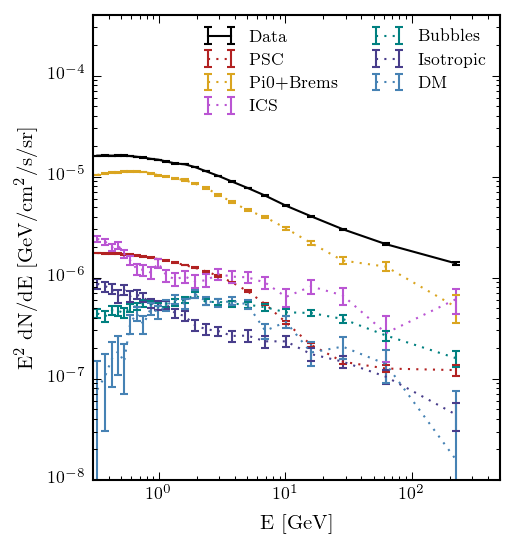

In [14]:
plt.figure(figsize=(3.5,4))
def PlotComponent(name):
    E, flux, stat = A.GetSpectrum(name)
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k')
    else:
        if np.ndim(stat)==1:
            plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat/1e3, label=name.replace('_','+'),capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,E**2*flux/1e3,(E**2*stat[:,0]/1e3,E**2*stat[:,1]/1e3), label=name.replace('_','+'),capthick=1, capsize=2, ls=':' )
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    
PlotComponent('Data')    
PlotComponent('PSC')
PlotComponent('Pi0_Brems')
PlotComponent('ICS')
PlotComponent('Bubbles')
PlotComponent('Isotropic')
PlotComponent('DM')

plt.legend(frameon=False, fontsize=8,ncol=2)
plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


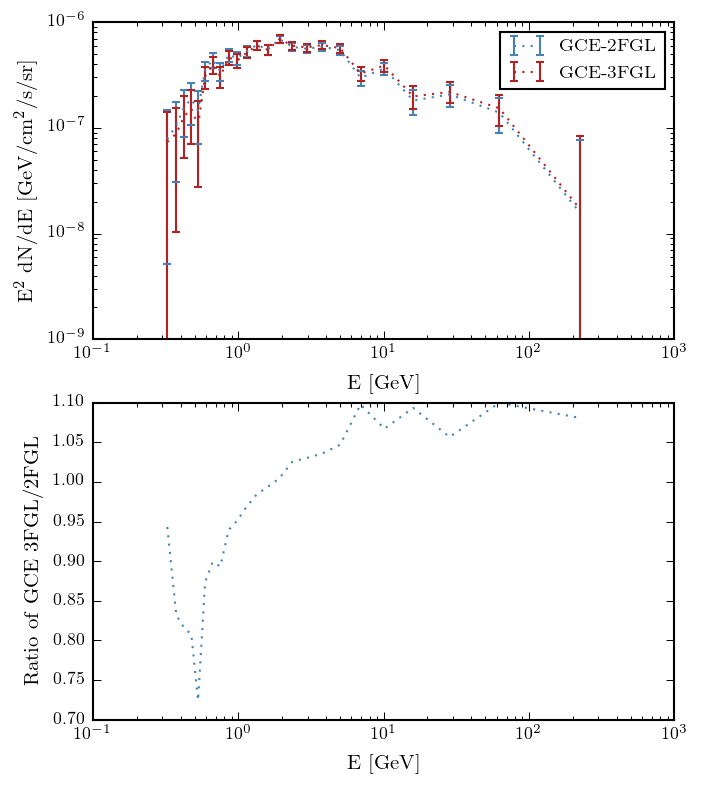

In [40]:
plt.figure(figsize=(5,6))

# 2FGL 
plt.subplot(211)

flux, stat = fgl2Fit['DM']['flux'], fgl2Fit['DM']['fluxunc']

E = fgl2Fit['energies']

plt.errorbar(E/1e3,E**2*flux/1e3,(E**2*stat[:,0]/1e3,E**2*stat[:,1]/1e3), 
             label='GCE-2FGL',capthick=1, capsize=2, ls=':' )

# 3FGL 
flux3, stat3 = fgl3Fit['DM']['flux'], fgl3Fit['DM']['fluxunc']
E = fgl3Fit['energies']
plt.errorbar(E/1e3,E**2*flux3/1e3,(E**2*stat3[:,0]/1e3,E**2*stat3[:,1]/1e3), 
             label='GCE-3FGL',capthick=1, capsize=2, ls=':' )


plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
plt.xlabel(r'$\rm{E\ [GeV]}$')

plt.subplot(212)


plt.errorbar(E/1e3,flux3/flux, 
             label='ratio',capthick=1, capsize=2, ls=':' )


plt.xscale('log')
plt.ylabel(r'$\rm{Ratio\ of\ GCE\ 3FGL/2FGL}$')
plt.xlabel(r'$\rm{E\ [GeV]}$')

plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/GCE_3fgl_vs_2fgl.pdf')
